# 0. PASOS PREVIOS

## 0.1 Librerías

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display,HTML



## 0.2  Funciones y otro Código a importar

In [2]:
def analisis_DF(x):
    a = x.shape
    b = x.size
    c = x.ndim
    d = x.info()
    return f"{a} filas por culumna, {b} total datos, {c} num. dimensiones. \n Estructura: \n {d}" 

def analisis_DF_2(x):
    a = print("INDICES: \n",x.index,"\n")
    b = print("COLUMNAS: \n",x.columns,"\n")
    c = print("VALORES: \n",x.values,"\n)")

def media_grupo(x):
    x = stats_grupo(x).drop(["count","25%","50%","75%","std","min","max"], axis=0)
    return x

def stats_grupo(Type_1):
    y = df_pokemon.drop(["Generation","Ataque","Defensa","Poder-num"], axis=1)
    return y[y["Type 1"] == Type_1].describe()

def stats_totales(x):
    x = stats_grupo(x).drop(["count","25%","50%","75%",], axis=0)
    return x

## 0.3  Definición de objetivos

Como objetivos para este estudio se plantean los siguientes:


 1)  Estudiar la evolución entre los tipos de pokémon a lo largo de las generaciones.
 
 2) Estudiar las características de combate de cada grupo de pokémon y su evolución a lo  largo del tiempo.
 
3) Gerarquizar los pokémon en función de su potencial.

# 1. CARGA DE DATOS 

## 1.1 Importación del fichero

In [3]:
df_pokemon = pd.read_csv("Pokemon.csv")

## 1.2 Información del fichero

Como primera toma de contacto, ejecutamos varias funciones genéricass para informarmos de las principales características del archivo a explorar.

In [4]:
analisis_DF(df_pokemon)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


'(800, 13) filas por culumna, 10400 total datos, 2 num. dimensiones. \n Estructura: \n None'

In [5]:
analisis_DF_2(df_pokemon)

INDICES: 
 RangeIndex(start=0, stop=800, step=1) 

COLUMNAS: 
 Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object') 

VALORES: 
 [[1 'Bulbasaur' 'Grass' ... 45 1 False]
 [2 'Ivysaur' 'Grass' ... 60 1 False]
 [3 'Venusaur' 'Grass' ... 80 1 False]
 ...
 [720 'HoopaHoopa Confined' 'Psychic' ... 70 6 True]
 [720 'HoopaHoopa Unbound' 'Psychic' ... 80 6 True]
 [721 'Volcanion' 'Fire' ... 70 6 True]] 
)


In [6]:
df_pokemon.sample(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
292,269,Dustox,Bug,Poison,385,60,50,70,50,90,65,3,False
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False
177,163,Hoothoot,Normal,Flying,262,60,30,30,36,56,50,2,False
259,240,Magby,Fire,NaN,365,45,75,37,70,55,83,2,False


# 2. ANÁLISIS EXPLORATORIO

## 2.1 Nulos y duplicados

Como detectamos que hay una gran cantidad de valores nulos en el "Type 2", los substituimos con el valor (sin_tipo) inplace.

In [7]:
df_pokemon.fillna("sin_tipo", inplace= True)

Ahora detectamos posibles duplicados.

In [8]:
df_pokemon.duplicated().sum()

0

## 2.2 Primera visualización

Dado que el DF ya tiene una calidad de dato elevada, y cuenta con variables categóricas y numéricas establecidas, a fin de buscar posibles insights y posibles preguntas, realizamos una primera exploración visual de la información.

A fin de eliminar informaición innecesaria, utilizo el número de pokémon como Key.

In [9]:
df_pokemon.set_index(("#"), inplace = True)

In [10]:
df_pokemon.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,sin_tipo,309,39,52,43,60,50,65,1,False


Resulta de interés ver que tipos de pokemon son de mayor frecuencia en cada generación:

In [11]:
px.histogram(data_frame = df_pokemon,
             x          = "Type 1",
             hover_data = ["Generation"],
             color      = "Generation",
             nbins      = 20)

Como primera pregunta, resulta de interés ver que tipos de pokemon son de mayor frecuencia en cada generación:

Ahora con el subtipo:


In [12]:
px.histogram(data_frame = df_pokemon,
             x          = "Type 2",
             hover_data = ["Generation"],
             color      = "Generation",
             nbins      = 20)

Consultamos el número de Pokémon por generación, y llama la atención que en la primera figuran 166, cuando es bien sabido que son 150 y Mew

In [13]:
cond_generacion = df_pokemon.groupby("Generation").count()
cond_generacion["Name"]
    

Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: Name, dtype: int64

In [14]:
cond_151 = df_pokemon["Generation"] == 1

In [15]:
df_pokemon[cond_151].tail(151)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False
13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False
15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False
15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
150,Mewtwo,Psychic,sin_tipo,680,106,110,90,154,90,130,1,True
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


Parece que si bien se respeta la codificación original, las formas "Mega", que aparecieron en generaciones posteriores, se incluyen dentro de la generación 1. Vamos a identificar todos los pokémon de la generación 1 con estas formas.

In [16]:
df_pokemon[df_pokemon.Name.str.contains('Mega') & cond_151]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,BlastoiseMega Blastoise,Water,sin_tipo,630,79,103,120,135,115,78,1,False
15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
65,AlakazamMega Alakazam,Psychic,sin_tipo,590,55,50,65,175,95,150,1,False
80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False


Son justo 15, que con los 151 originales, sumarian los 166 detectados con el primer filtro.




# 3. GENERACIÓN DE NUEVAS VARIABLES

Se crearán 2 nuevas variables para agrupar las stats defensivas y ofensivas de los pokemon:

In [17]:
df_pokemon["Ataque"] = df_pokemon["Attack"] + df_pokemon["Sp. Atk"]

In [18]:
df_pokemon["Defensa"] = df_pokemon["Defense"] + df_pokemon["Sp. Def"]

Realizamos buckets en función de los niveles de poder de los Pokémon, creándolas por duplicado con variables numéricas que permitan un mejor tratamiento de datos tal que:


### 3.1 Niveles de poder de Pokémon

In [19]:
condiciones = [(df_pokemon["Total"] >= 750),
               (df_pokemon["Total"] >= 650) & (df_pokemon["Total"] < 750),
               (df_pokemon["Total"] >= 550) & (df_pokemon["Total"] < 650),
               (df_pokemon["Total"] >= 430) & (df_pokemon["Total"] < 550),
               (df_pokemon["Total"] >= 330) & (df_pokemon["Total"] < 430),
               (df_pokemon["Total"] < 430)]

opciones = ["1. Dios","2. Legendario","3. Mítico","4. Poderoso","5. Normal","6. Débil"]
df_pokemon["Poder"]=np.select(condiciones, opciones)         

In [20]:
condiciones = [(df_pokemon["Total"] >= 750),
               (df_pokemon["Total"] >= 650) & (df_pokemon["Total"] < 750),
               (df_pokemon["Total"] >= 550) & (df_pokemon["Total"] < 650),
               (df_pokemon["Total"] >= 430) & (df_pokemon["Total"] < 550),
               (df_pokemon["Total"] >= 330) & (df_pokemon["Total"] < 430),
               (df_pokemon["Total"] < 430)]

opciones = [10,9,8,7,6,5]
df_pokemon["Poder-num"]=np.select(condiciones, opciones) 

### 3.2 Familias de Pokémon

Creamos una nueva columna que categoriza los pokémon en función de su tipo y subtipo.

In [21]:
df_pokemon["Familia"] = df_pokemon["Type 1"] +" " + df_pokemon["Type 2"]

### 3.3 Grupos funcionales de pokémon

df_pokemon.sample(3)


#Creación de una columna atendiendo a los principales grupos estratégicos de pokémon.

#condiciones = [(df_pokemon["HP"] >= 80) & (df_pokemon["Defense"] >= 100),
               (df_pokemon["HP"] >= 80) & (df_pokemon["Sp. Def"] >= 100),
               (df_pokemon["Speed"] >= 650) & (df_pokemon["Sp Atk"] < 750),
               (df_pokemon["Speed"] >= 550) & (df_pokemon["Attack"] < 650),
               (df_pokemon["Total"] >= 430) & (df_pokemon["Total"] < 550),
               (df_pokemon["Total"] >= 330) & (df_pokemon["Total"] < 430),
               (df_pokemon["Total"] < 430)]

opciones = ["Tanque","Tanque especial","Pistolero",7,6,5]
df_pokemon["Poder-num"]=np.select(condiciones, opciones)

c1 = df_pokemon["Poder"]=="1. Dios"
c2 = df_pokemon["Poder"]=="2. Legendario"
c3 = df_pokemon["Poder"]=="3. Mítico"
c4 = df_pokemon["Poder"]=="4. Poderoso"

px.strip(data_frame = df_pokemon[(c1) | (c2) | (c3) | (c4)], ## mas de 90
         x          = "Defense",
         y         = "Sp. Def",
         hover_data = ["Name"],
         color      = "Type 1")

px.strip(data_frame = df_pokemon[(c1) | (c2) | (c3) | (c4)], ## mas de 100
         x          = "Attack",
         y         = "Sp. Atk",
         hover_data = ["Name"],
         color      = "Type 1")

In [22]:
c1 = df_pokemon["Poder"]=="1. Dios"
c2 = df_pokemon["Poder"]=="2. Legendario"
c3 = df_pokemon["Poder"]=="3. Mítico"
c4 = df_pokemon["Poder"]=="4. Poderoso"

In [23]:
px.strip(data_frame = df_pokemon[(c1) | (c2) | (c3) | (c4)], ## mas de 95 
         x          = "Attack",
         y         = "Speed",
         hover_data = ["Name"],
         color      = "Type 1")

In [24]:
px.strip(data_frame = df_pokemon[(c1) | (c2) | (c3) | (c4)], ## mas de 95
         x          = "Sp. Atk",
         y         = "Speed",
         hover_data = ["Name"],
         color      = "Type 1")

In [25]:
px.strip(data_frame = df_pokemon[(c1) | (c2) | (c3) | (c4)], ## mas de 95
         x          = "HP",
         y         = "Defense",
         hover_data = ["Name"],
         color      = "Type 1")

In [26]:
px.strip(data_frame = df_pokemon[(c1) | (c2) | (c3) | (c4)], ## mas de 95
         x          = "HP",
         y         = "Sp. Def",
         hover_data = ["Name"],
         color      = "Type 1")

In [27]:
c1 = df_pokemon["Poder"]=="1. Dios"
c2 = df_pokemon["Poder"]=="2. Legendario"
c3 = df_pokemon["Poder"]=="3. Mítico"
c4 = df_pokemon["Poder"]=="4. Poderoso"

# 4. ANÁLISIS DE LOS DATOS

### 4.1. Perspectiva general en función del poder total

In [28]:
px.strip(df_pokemon,
         x          = "Total",
        
         color      = "Generation")

Los Pokemons de mayor poder se encuentran en la primera y la tercera generación, que serían los siguientes:

In [29]:
filtro_dios = df_pokemon["Poder"] == "1. Dios"
df_pokemon[filtro_dios]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Ataque,Defensa,Poder,Poder-num,Familia
#,,,,,,,,,,,,,,,,,
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,344,200,1. Dios,10,Psychic Fighting
150,MewtwoMega Mewtwo Y,Psychic,sin_tipo,780,106,150,70,194,120,140,1,True,344,190,1. Dios,10,Psychic sin_tipo
382,KyogrePrimal Kyogre,Water,sin_tipo,770,100,150,90,180,160,90,3,True,330,250,1. Dios,10,Water sin_tipo
383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,330,250,1. Dios,10,Ground Fire
384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,360,200,1. Dios,10,Dragon Flying


### 4.2 Clasificación en función del poder

Ahora vamos a ver si hay algún tipo de relación entre estos niveles, y el tipo o la generación.


In [30]:
px.histogram(data_frame = df_pokemon,
             x          = "Poder",
             hover_data = ["Generation"],
             color      = "Generation",
             nbins      = 6)

In [31]:
px.histogram(data_frame = df_pokemon,
             x          = "Generation",
             hover_data = ["Poder"],
             color      = "Poder",
             nbins      = 10)

In [32]:
px.histogram(data_frame = df_pokemon,
             x          = "Type 1",
             hover_data = ["Poder"],
             color      = "Poder",
             nbins      = 30)

### 4.3 Poder en función del tipo y subtipo

In [33]:
px.histogram(data_frame = df_pokemon,
             x          = "Total",
             hover_data = ["Type 1"],
             color      = "Type 1",
             nbins      = 13)

In [34]:
px.strip(df_pokemon,
         x          = "Type 1",
         y      = "Total",
         color      = "Poder")

### 4.4 Análisis del poder en función de la Familia

In [35]:
### 4.3 Análisis del poder en función del tipo

In [36]:
px.histogram(data_frame = df_pokemon,
             x          = "Total",
             hover_data = ["Familia"],
             color      = "Familia",
             nbins      = 13)

Ahora podemos hacer una nueva bucketización en función de estos subtipos



In [37]:
pok = df_pokemon.groupby(["Poder","Familia"])["Total"].count()
pok = pok.to_frame()
pok = pok.reset_index()
pok.head(20)

,Poder,Familia,Total
0,1. Dios,Dragon Flying,1
1,1. Dios,Ground Fire,1
2,1. Dios,Psychic Fighting,1
3,1. Dios,Psychic sin_tipo,1
4,1. Dios,Water sin_tipo,1
5,2. Legendario,Dark Flying,1
6,2. Legendario,Dragon Electric,1
7,2. Legendario,Dragon Fire,1
8,2. Legendario,Dragon Flying,2
9,2. Legendario,Dragon Ground,1


#### Familias con pokémon más poderosos

##### Nivel DIOS

In [38]:
pok = df_pokemon.groupby(["Poder","Familia"])["Total"].mean()
pok = pok.to_frame()
pok.tail(100)

Total
Poder     Familia                
5. Normal Ground Rock      345.00
          Ground sin_tipo  372.50
          Ice Flying       330.00
          Ice Water        410.00
          Ice sin_tipo     395.00
...                           ...
6. Débil  Water Flying     287.50
          Water Grass      220.00
          Water Ground     249.00
          Water Psychic    315.00
          Water sin_tipo   300.35

[100 rows x 1 columns]

### 4.6 Poder en función de la Generación

In [39]:
df_generacion = df_pokemon.groupby('Generation')['Total'].mean() 
df_generacion = df_generacion.to_frame()
df_generacion



,Total
Generation,
1,426.813253
2,418.283019
3,436.225000
4,459.016529
5,434.987879
6,436.378049


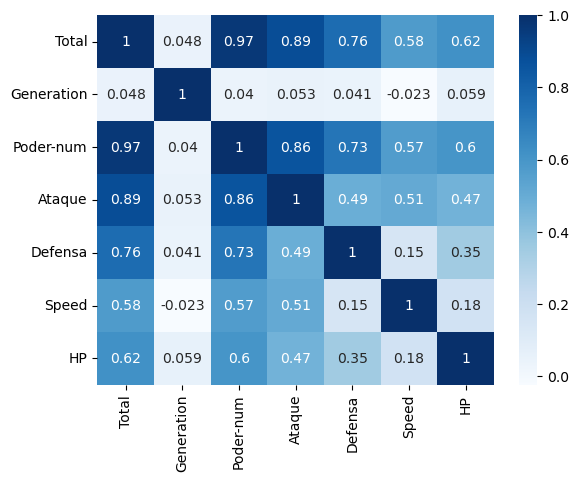

In [40]:
sns.heatmap(data = df_pokemon[["Total", "Generation","Poder-num","Ataque","Defensa","Speed","HP"]].corr(),
            annot = True,
            cmap = "Blues")
plt.show()

#### Conclusión:
No existe una relación directa entre la generación y el poder. LLama la atención la relación inversa entre la velocidad y la generación.

### 4.7 Poder en fiunción del Tipo

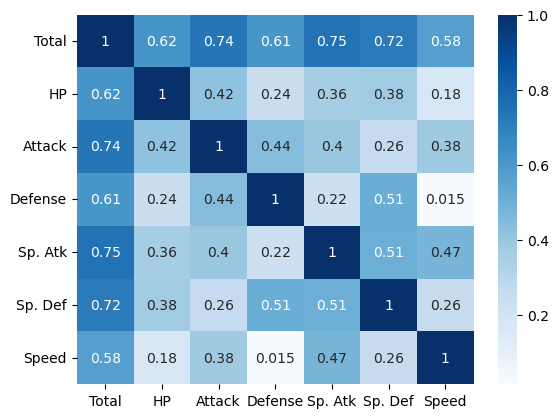

In [41]:
sns.heatmap(data = df_pokemon[["Total", "HP", "Attack", "Defense","Sp. Atk", "Sp. Def", "Speed"]].corr(),
            annot = True,
            cmap = "Blues")
plt.show()

In [42]:
df_pokemon.sample(2)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Ataque,Defensa,Poder,Poder-num,Familia
#,,,,,,,,,,,,,,,,,
636,Larvesta,Bug,Fire,360,55,85,55,50,55,60,5,False,135,110,5. Normal,6,Bug Fire
624,Pawniard,Dark,Steel,340,45,85,70,40,40,60,5,False,125,110,5. Normal,6,Dark Steel


In [43]:
px.scatter(data_frame = df_pokemon,
          y          = "Total",
          color      = "Type 1",
          facet_col  = "Generation",
          hover_name = "Name")

In [44]:
tipos = df_pokemon["Type 1"].unique().tolist()

    

In [45]:
Grass = media_grupo("Grass")
Fire = media_grupo("Fire")
Water = media_grupo("Water")
Bug = media_grupo("Bug")
Normal = media_grupo("Normal")
Poison = media_grupo("Poison")
Electric = media_grupo("Electric")
Ground = media_grupo("Ground")
Fairy = media_grupo("Fairy")
Fighting = media_grupo("Fighting")
Psychic = media_grupo("Psychic")
Rock = media_grupo("Rock")
Ghost = media_grupo("Ghost")
Ice = media_grupo("Ice")
Dragon = media_grupo("Dragon")
Dark = media_grupo("Dark")
Steel = media_grupo("Steel")
Flyinf = media_grupo("Flying")


In [46]:
tipos_vertical = pd.concat([Grass, Fire,Water,Bug,Normal,Poison, Electric,Ground, Fairy, Fighting, Psychic, Rock, Ghost, Ice,Dragon,Dark, Steel,Flyinf], ignore_index = True, sort = False)
tipos_vertical.index = ["Grass",
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon',
 'Dark',
 'Steel',
 'Flying']

In [47]:
Ttipos_vertical = tipos_vertical.T

In [48]:
tipos_vertical.iplot(kind='bar', xTitle='nivel', yTitle='Tipo')

In [49]:
px.scatter(data_frame = df_pokemon,
          x          = "Attack",
          y          = "Sp. Atk",
          color      = "Poder",
          facet_col  = "Generation",
          hover_name = "Name")

In [50]:
px.scatter(data_frame = df_pokemon,
          x          = "Defense",
          y          = "Sp. Def",
          color      = "Poder",
          facet_col  = "Generation",
          hover_name = "Name")

In [51]:
px.scatter(data_frame = df_pokemon,
          x          = "HP",
          y          = "Defense",
          color      = "Type 1",
          facet_col  = "Generation",
          hover_name = "Name")

In [52]:
px.scatter(data_frame = df_pokemon,
          x          = "Speed",
          y          = "Sp. Atk",
          color      = "Type 1",
          facet_col  = "Generation",
          hover_name = "Name")